# INSTRUCTIONS

For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

    For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
    You will then answer provided stakeholder questions and support your answers with visualizations.

# Chicago Crime Data

    Source: Chicago Data Portal: Crimes 2001 to Present
        Data Description:
            All Crimes that were reported in the city of Chicago and their details
            View Preview
        Includes:
            type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
        Note: the .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository. We have provided a helper notebook below to process your downloaded file into a repo-friendly format. 
    Data Processing Helper Notebook:
        Use the helper notebook in this repository to process your manually-downloaded csv into several .csv.gz files: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
        You can either Fork your own copy of the repository and rename it to be your "Project 4" repository, or you can download the notebook and save it in your own repository.

    Supplemental Data: Holiday Data
        To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API.
        We have provided an extract of holidays, but you may wish to extract additional holiday information for dates not included in this file.
            Share URL
            Raw CSV URL (Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv

    Notes/Considerations:
        You may need to keep 2 forms of the data:
            The original individual crime data with a datetime index. (Each row is 1 crime)
            A resampled/converted crime counts version (Each row is 1 day)

# Task

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

    Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
    
   - 1) Comparing Police Districts:
            Which district has the most crimes? Which has the least?
    - 2) Crimes Across the Years:
            Is the total number of crimes increasing or decreasing across the years?
            Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
     - 3) Comparing AM vs. PM Rush Hour:
            Are crimes more common during AM rush hour or PM rush hour?
                You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
                You can consider any crime that occurred between 4 -7 PM as PM rush hour.
            What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
            Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
    - 4) Comparing Months:
            What months have the most crime? What months have the least?
            Are there any individual crimes that do not follow this pattern? If so, which crimes?
     - 5) Comparing Holidays:
            Are there any holidays that show an increase in the # of crimes?
            Are there any holidays that show a decrease in the # of crimes?

# Final Submission

Submit the link to your GitHub Repository (make sure it is public!)

# Chicago Crime Data Imports

In [1]:
import glob
import pandas as pd
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767374 entries, 0 to 56465
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 666.7+ MB


In [4]:
import holidays
import datetime as dt
from holidays import country_holidays
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

# The original individual crime data with a datetime index. (Each row is 1 crime)

In [6]:
## Converting crimedatetime and coercing errors
df['CrimeDate'] = pd.to_datetime(df['Date'],errors='coerce')
df_dt = df.dropna(subset=['Date'])
## setting and sorting the index
df_dt = df.set_index("CrimeDate")
df_dt = df_dt.sort_index()
df_dt.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
CrimeDate,,,,,,,,,,,,
2001-01-01,3567929,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1024,10.0,24.0,41.848345,-87.706223
2001-01-01,3272413,2001-01-01,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,17.0,41.756087,-87.642812
2001-01-01,2747154,2001-01-01,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,True,False,1133,11.0,24.0,41.872038,-87.713019


In [10]:
## Engineering Features using components of the date/time
df_dt['Year']  = df_dt.index.year

In [18]:
df_dt

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
CrimeDate,,,,,,,,,,,,,
2001-01-01 00:00:00,3567929,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1024,10.0,24.0,41.848345,-87.706223,2001
2001-01-01 00:00:00,3272413,2001-01-01 00:00:00,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,17.0,41.756087,-87.642812,2001
2001-01-01 00:00:00,2747154,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,True,False,1133,11.0,24.0,41.872038,-87.713019,2001
2001-01-01 00:00:00,1548960,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,714,7.0,NaN,41.779460,-87.671353,2001
2001-01-01 00:00:00,5508664,2001-01-01 00:00:00,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,27.0,41.898041,-87.725087,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 23:53:00,13024916,2023-03-28 23:53:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,232,2.0,20.0,41.788477,-87.620684,2023
2023-03-28 23:55:00,13024752,2023-03-28 23:55:00,CRIMINAL TRESPASS,TO LAND,SPORTS ARENA / STADIUM,True,False,1923,19.0,44.0,41.949004,-87.656865,2023
2023-03-28 23:56:00,13024755,2023-03-28 23:56:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,834,8.0,18.0,41.752547,-87.730659,2023


In [72]:
## Engineering Features using components of the date/time
df_dt['Month']  = df_dt.index.month
df_dt

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Month
CrimeDate,,,,,,,,,,,,,,
2001-01-01 00:00:00,3567929,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1024,10.0,24.0,41.848345,-87.706223,2001,1
2001-01-01 00:00:00,3272413,2001-01-01 00:00:00,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,17.0,41.756087,-87.642812,2001,1
2001-01-01 00:00:00,2747154,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,True,False,1133,11.0,24.0,41.872038,-87.713019,2001,1
2001-01-01 00:00:00,1548960,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,714,7.0,NaN,41.779460,-87.671353,2001,1
2001-01-01 00:00:00,5508664,2001-01-01 00:00:00,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,27.0,41.898041,-87.725087,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 23:53:00,13024916,2023-03-28 23:53:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,232,2.0,20.0,41.788477,-87.620684,2023,3
2023-03-28 23:55:00,13024752,2023-03-28 23:55:00,CRIMINAL TRESPASS,TO LAND,SPORTS ARENA / STADIUM,True,False,1923,19.0,44.0,41.949004,-87.656865,2023,3
2023-03-28 23:56:00,13024755,2023-03-28 23:56:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,834,8.0,18.0,41.752547,-87.730659,2023,3


# Task (at least 3 topics)

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

# 1) Comparing Police Districts:

    Which district has the most crimes? Which has the least?

In [23]:
df_dt['District'].value_counts().sort_values()

21.0         4
31.0       232
20.0    137293
17.0    224218
24.0    234569
22.0    254555
16.0    259816
14.0    300607
1.0     313651
15.0    333207
10.0    334633
5.0     344327
18.0    348490
19.0    348508
2.0     367465
9.0     379595
12.0    384595
3.0     393972
4.0     440970
25.0    441980
7.0     449681
6.0     454097
11.0    498742
8.0     522120
Name: District, dtype: int64

District 8 has the most crimes and 21 had the least.

In [22]:
crimes_by_district = df.groupby('Description')['District'].value_counts().sort_index()
crimes_by_district

Description      District
$300 AND UNDER   1.0         1
                 2.0         1
                 3.0         2
                 7.0         1
                 8.0         2
                            ..
WIREROOM/SPORTS  17.0        5
                 18.0        1
                 19.0        2
                 20.0        6
                 24.0        1
Name: District, Length: 9608, dtype: int64

# 2) Crimes Across the Years:

## Is the total number of crimes increasing or decreasing across the years?

In [124]:
crimes_by_year = df_dt.groupby("Year")['Description'].value_counts(normalize=False).sort_index()
crimes_by_year

Year  Description                                    
2001  $300 AND UNDER                                         5
      $500 AND UNDER                                     61784
      AGG CRIM SEX ABUSE FAM MEMBER                        152
      AGG CRIMINAL SEXUAL ABUSE                            472
      AGG PO HANDS NO/MIN INJURY                           386
                                                         ...  
2023  VIOLATION OF STALKING NO CONTACT ORDER                32
      VIOLATION OF SUMMARY CLOSURE                           1
      VIOLENT OFFENDER - ANNUAL REGISTRATION                11
      VIOLENT OFFENDER - DUTY TO REGISTER                    7
      VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS        2
Name: Description, Length: 7553, dtype: int64

In [125]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Year,Description,# of Crimes
0,2001,$300 AND UNDER,5
1,2001,$500 AND UNDER,61784
2,2001,AGG CRIM SEX ABUSE FAM MEMBER,152
3,2001,AGG CRIMINAL SEXUAL ABUSE,472
4,2001,AGG PO HANDS NO/MIN INJURY,386
...,...,...,...
7548,2023,VIOLATION OF STALKING NO CONTACT ORDER,32
7549,2023,VIOLATION OF SUMMARY CLOSURE,1
7550,2023,VIOLENT OFFENDER - ANNUAL REGISTRATION,11
7551,2023,VIOLENT OFFENDER - DUTY TO REGISTER,7


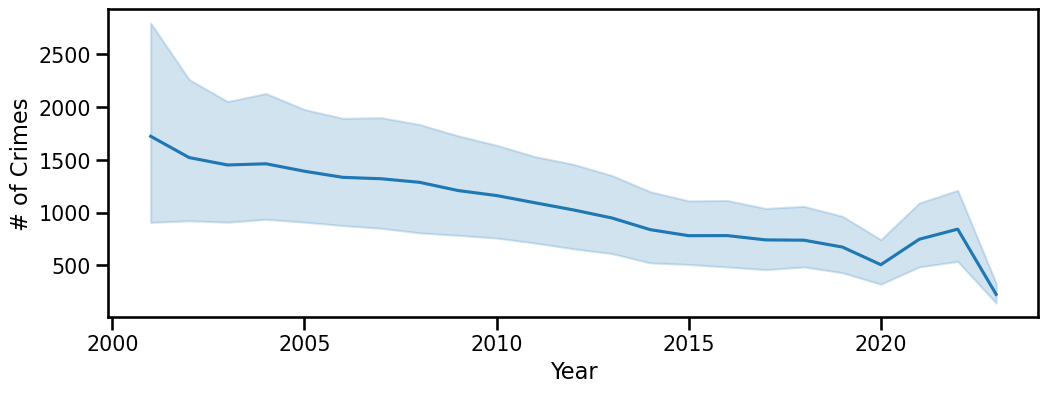

In [126]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')


Crime seems to be decreasing over the years except for the most recent years, perhaps due to COVID, we will not count 2023 as it hasn't happened yet.

## Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

# 4) Comparing Months:

    What months have the most crime? What months have the least?
    Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [101]:
crimes_by_month = df_dt.groupby("Month")['Description'].value_counts(normalize=False).sort_index()
crimes_by_month



Month  Description                                    
1      $500 AND UNDER                                     46895
       ABUSE / NEGLECT - CARE FACILITY                        3
       ABUSE/NEGLECT: CARE FACILITY                          12
       AGG CRIM SEX ABUSE FAM MEMBER                        881
       AGG CRIMINAL SEXUAL ABUSE                            754
                                                          ...  
12     VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS        1
       VIOLENT OFFENDER: ANNUAL REGISTRATION                 21
       VIOLENT OFFENDER: DUTY TO REGISTER                     4
       VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS         5
       WIREROOM/SPORTS                                        4
Name: Description, Length: 5661, dtype: int64

In [102]:
## convert to dataframe and reset_index()
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df



,Month,Description,# of Crimes
0,1,$500 AND UNDER,46895
1,1,ABUSE / NEGLECT - CARE FACILITY,3
2,1,ABUSE/NEGLECT: CARE FACILITY,12
3,1,AGG CRIM SEX ABUSE FAM MEMBER,881
4,1,AGG CRIMINAL SEXUAL ABUSE,754
...,...,...,...
5656,12,VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS,1
5657,12,VIOLENT OFFENDER: ANNUAL REGISTRATION,21
5658,12,VIOLENT OFFENDER: DUTY TO REGISTER,4
5659,12,VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS,5


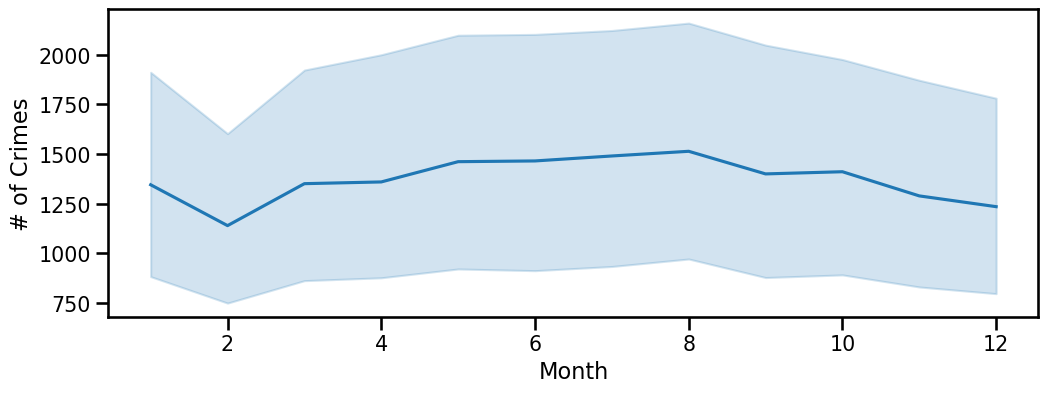

In [104]:
ax = sns.lineplot(data=plot_df, x='Month',y='# of Crimes')



## What months have the most crime? What months have the least?|

Feb seemed to have the least crime, while August had the most.

## Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [116]:
## Getting all of the crimes from the first level of the index
crime_list = crimes_by_month.index.levels[1]
crime_list



Index(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY',
       'ABUSE/NEGLECT: CARE FACILITY', 'ADULTRY',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'AGG CRIMINAL SEXUAL ABUSE',
       'AGG PO HANDS ETC SERIOUS INJ', 'AGG PO HANDS NO/MIN INJURY',
       'AGG PRO EMP HANDS SERIOUS INJ',
       ...
       'VIOLATION OF STALKING NO CONTACT ORDER',
       'VIOLATION OF SUMMARY CLOSURE',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS', 'WIREROOM/HORSES',
       'WIREROOM/SPORTS'],
      dtype='object', name='Description', length=544)

In [120]:
crimes_by_month2 = df_dt.groupby("Description")['Month'].value_counts(normalize=False).sort_index()
crimes_by_month2

Description      Month
$300 AND UNDER   2        1
                 3        4
                 4        1
                 5        1
                 6        1
                         ..
WIREROOM/SPORTS  8        3
                 9        1
                 10       5
                 11       8
                 12       4
Name: Month, Length: 5661, dtype: int64

In [122]:
##selecting a test crime and slicing the result
crime='$300 AND UNDER'
crimes_by_month2.loc[crime]



Month
2     1
3     4
4     1
5     1
6     1
7     1
8     1
10    1
11    2
12    2
Name: Month, dtype: int64